## Plots of the LSBG properties

In this notebook I present the plots that show the galfit-based properties of our LSBG sample.

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
#import seaborn as sns
#sns.set(style='whitegrid',font='serif',rc={'text.usetex' : True})
#sns.set_style({'xtick.bottom': True, 'xtick.top': True})

### Define a function that creates jointplots
I modify the plotting generation function in a way that the two sub-samples (red/blue) are not equal

In [3]:
from matplotlib import gridspec
from scipy.stats import gaussian_kde

def jointPlot(data_1, data_2, dims,cols,bins,kde=False,**kwargs):
    '''
    data = our dataset - dimensions (:,2) or (:,4) depending on the dimension
    dims = 2 or 4 - 2 in case we have a joint plot of one type of data - 4 if we have two types of data
    cols = colors (1 or 2)
    '''
    # ============================================================
    # ============================================================
    # Define the max and mins of the first dataset
    x_min_1, x_max_1 = data_1[:,0].min(),data_1[:,0].max()
    y_min_1, y_max_1 = data_1[:,1].min(),data_1[:,1].max()
    
    # Now if dims = 4, find the min and max of the second dataset as well
    if (dims==4):
        x_min_2, x_max_2 = data_2[:,0].min(),data_2[:,0].max()
        y_min_2, y_max_2 = data_2[:,1].min(),data_2[:,1].max()
    
    # ============================================================
    # ============================================================
    # Define grid for subplots
    gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.2, width_ratios=[4, 1], height_ratios = [1, 4])
    
    # ============================================================
    # ============================================================
    #Create scatter plot
    fig = plt.figure(figsize=(5.5,5.5),facecolor='white')
    ax = plt.subplot(gs[1, 0],frameon = True)
    cax = ax.scatter(data_1[:,0], data_1[:,1],rasterized=True, color=cols[0], s=0.7, alpha=.6)
    # Now in case dims=4, add one more scatter plot
    if (dims==4):
        cax = ax.scatter(data_2[:,0], data_2[:,1], rasterized=True,color=cols[1], s=0.7, alpha=.7)
   
    ax.grid(ls='--', axis='both' ,alpha=0.6)
    
    ax.set_xlabel(kwargs['xlabel'],fontsize=13)
    ax.set_ylabel(kwargs['ylabel'],fontsize=13)
    # ===============================================================
    # ===============================================================
    # Lower and upper limits in the x and y directions
    x_low = kwargs['xlow']
    x_up = kwargs['xup']
    y_low = kwargs['ylow']
    y_up = kwargs['yup']
    # ===============================================================
    # ===============================================================
    #Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], sharey=ax, frameon = True, xticks = [],ylim=(y_low,y_up)) 
    axr.hist(data_1[:,1],bins=bins, color = cols[0],alpha=0.6, orientation = 'horizontal', normed = True)
    # In case dims = 4, add one more historgram
    if (dims==4):
        axr.hist(data_2[:,1],bins=bins, color = cols[1],alpha=0.7, orientation = 'horizontal', normed = True)
        
    
    axr.grid(ls='--', axis='both' ,alpha=0.6)
    
    
    # ===============================================================
    #Create X-marginal(top)
    axt = plt.subplot(gs[0,0], sharex=ax,frameon = True, yticks=[],xlim=(x_low,x_up))
    axt.hist(data_1[:,0],bins=bins, color = cols[0],alpha=0.6, normed = True)
    # In case dims = 4, add one more histogram
    if (dims==4):
        axt.hist(data_2[:,0],bins=bins, color = cols[1],alpha=0.7, normed = True)
        
    axt.grid(ls='--', axis='both' ,alpha=0.6)
    
    #Bring the marginals closer to the scatter plot
    fig.tight_layout(pad = 0.0)

    if kde:
        kdex_1=gaussian_kde(data_1[:,0])
        kdey_1=gaussian_kde(data_1[:,1])
        x_1= np.linspace(x_min_1,x_max_1,100)
        y_1= np.linspace(y_min_1,y_max_1,100)
        dx_1=kdex_1(x_1)
        dy_1=kdey_1(y_1)
        axr.plot(dy_1,y_1,color='grey',linewidth=1)
        axt.plot(x_1,dx_1,color='gray', linewidth=1)
        
        # And in case dims = 4, we have more kdes
        if (dims==4):
            kdex_2=gaussian_kde(data_2[:,0])
            kdey_2=gaussian_kde(data_2[:,1])
            x_2= np.linspace(x_min_2,x_max_2,100)
            y_2= np.linspace(y_min_2,y_max_2,100)
            dx_2=kdex_2(x_2)
            dy_2=kdey_2(y_2)
            axr.plot(dy_2,y_2,color='grey', ls='--', linewidth=1)
            axt.plot(x_2,dx_2,color='grey', ls='--', linewidth=1)
        
    return ax,axt,axr
    

### Import the catalog with the Galfit results now

In [4]:
from astropy.io import fits
import pandas as pd

LSBG_df = pd.read_csv('LSBG_sample.csv')


mag_g = LSBG_df['mag_g'].values
mag_r = LSBG_df['mag_r'].values
mag_i = LSBG_df['mag_i'].values

R_eff = LSBG_df['R_eff_g'].values
n_ser = LSBG_df['n_ser'].values

RA = LSBG_df['RA'].values
DEC = LSBG_df['DEC'].values

#LSBG_df.head()

In [5]:
# Define the colors here
col_g_i = mag_g - mag_i
col_g_r = mag_g - mag_r
col_i_r = mag_i - mag_r


# Define the point in g-i color, that divides red from blue galaxies
med_g_i = 0.59109109

###  Mean surface brightness - radius relationship

Here I present the relationship between the mean surface brightness and effective radius.

The mean surface brightness can be calculated from the effective radius and the magnitude as:

\begin{equation}
\left\langle \mu \right\rangle_{eff} = m + 2.5\log (2\pi R_{eff}^2)
\end{equation}

where $m$ the apparent magnitude in the band under consideration.

In [6]:
mu_mean_g = mag_g + 2.5*np.log10(2.0*np.pi*(R_eff**2.0))

# Mean brightness - split in red and blue
mu_mean_g_red = mu_mean_g[(mu_mean_g>21)&(col_g_i>med_g_i)&(mu_mean_g<50)]
mu_mean_g_blue = mu_mean_g[(mu_mean_g>21)&(col_g_i<med_g_i)&(mu_mean_g<50)]


# Effective radius - split in red blue
r_eff_red = R_eff[(mu_mean_g>21)&(col_g_i>med_g_i)&(mu_mean_g<50)]
r_eff_blue = R_eff[(mu_mean_g>21)&(col_g_i<med_g_i)&(mu_mean_g<50)]

# Create a "dataset" compatible to the jointPlot function
data_1 = np.zeros((len(mu_mean_g_blue),2))
data_1[:,0] = mu_mean_g_blue;data_1[:,1] = r_eff_blue
data_2 = np.zeros((len(mu_mean_g_red),2))
data_2[:,0] = mu_mean_g_red;data_2[:,1] = r_eff_red

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


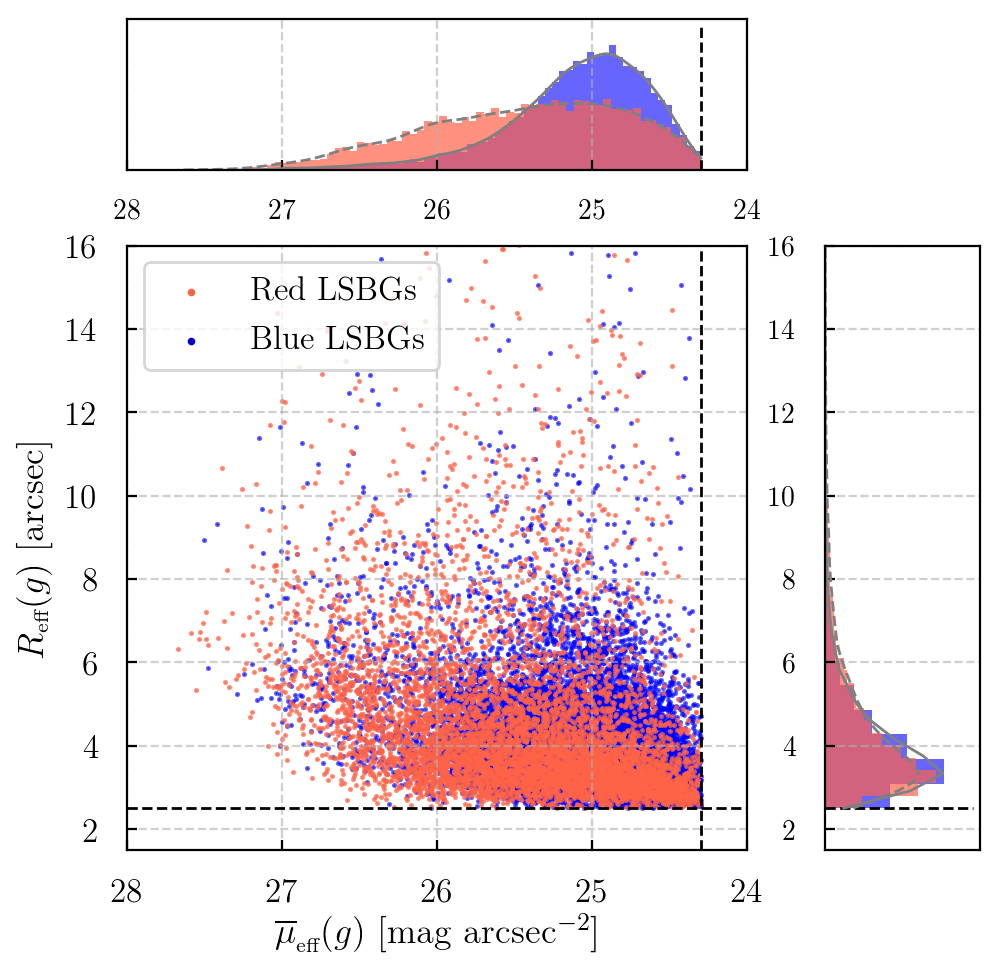

In [7]:
xlabel = '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)$ [mag arcsec$^{-2}$]'
#ylabel = '$r_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(data_1,data_2, dims=4,cols=['blue','tomato'],bins=70,kde=True,xlabel=xlabel, ylabel=ylabel, xlow=28,xup=24,ylow=1.5,yup=16)
ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axt.vlines(24.3,0,1.2,color='k', linewidth=1.0,linestyle='--')
axr.hlines(2.5,0.,0.65,color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_xticks([28,27,26,25,24])

ax.scatter(mu_mean_g_red[0],30, s=3,color='tomato', label='Red LSBGs')
ax.scatter(mu_mean_g_blue[0],30,s=3, color='mediumblue', label='Blue LSBGs')

ax.legend(frameon=True, loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('Eff_rad_surf_bright.pdf', dpi=100)
plt.show()

In [8]:
print(np.median(r_eff_blue))
print(np.median(r_eff_red))
print(np.median(R_eff[(mu_mean_g>21)&(mu_mean_g<50)]))

perc = [50,60,80,90]
perc_blue = np.percentile(r_eff_blue, perc)
perc_red = np.percentile(r_eff_red, perc)
perc_all = np.percentile(R_eff, perc)

print(perc_blue)
print(perc_red)
print(perc_all)

print(np.median(mu_mean_g_red))
print(np.median(mu_mean_g_blue))

perc_blue = np.percentile(mu_mean_g_red, perc)
perc_red = np.percentile(mu_mean_g_blue, perc)
print(perc_blue)
print(perc_red)

3.7222612
3.8680506
3.7626169000000003
[3.7222612  3.97630288 4.759807   5.55934604]
[3.8680506  4.2353427  5.4390728  6.84039578]
[3.7626169  4.0478032  4.98098934 5.966689  ]
25.382407429944898
25.02564407569667
[25.38240743 25.58509922 26.0380182  26.37376272]
[25.02564408 25.13736683 25.43044196 25.71193759]


###  Central surface brightness - sersic index relationship

For this part we will need to estimate the central surface brightness $\mu_0$. This is given by:

\begin{equation}
\mu_0 = \mu_e - \frac{2.5 b}{\ln(10)}
\end{equation}

$b$ can be calculated by solving the equation:

\begin{equation}
\Gamma(2n) = 2\gamma(2n,b),
\end{equation}
where:
\begin{equation}
\gamma(2n,x) = \int_0^x e^{-t}t^{2n-1} dt
\end{equation}
the incomplete gamma function.

Now, we have to estimate $\mu_e$. To do that we use the mean surface brightness, $\langle \mu \rangle_e$, calculated above.

We have that: 
\begin{equation}
\mu_e = \langle \mu \rangle_e + 2.5\log[f(n)]
\end{equation}

Where:
\begin{equation}
f(n) = \frac{ne^b}{b^{2n}}\Gamma(2n)
\end{equation}
and
\begin{equation}
\Gamma(2n) = \int_0^\infty e^{-x} x^{2n - 1} dx
\end{equation}


The final formula for $\mu_0$ is:

\begin{equation}
\mu_0 = \langle \mu \rangle_e + 2.5\log[f(n)] - \frac{2.5 b}{\ln(10)}
\end{equation}

with the needed parameters calculated as described above.

In [9]:
# First part, calculation of b for a given n. Write a function that does that.
from scipy.special import gamma
from scipy.special import gammainc # Note that the incomplete gamma function 
from scipy.optimize import root_scalar
n_ser = LSBG_df['n_ser'].values

def funct(x, *args):
    """
    The function to be minimized
    """
    n = args[0]
    fun = 2.0*gammainc(2.0*n,x) - 1.0
    return fun
    
def b_return(n):
    """
    This function returns the parameter b for a given
    Sersic index n, solving the equations described above
    """
    
    b_ret = root_scalar(funct, args=(n), method='bisect', bracket=[0.01, 40])
    return b_ret.root
    
b_n = np.zeros(len(n_ser))


for i in range(len(b_n)):
    b_n[i] = b_return(n_ser[i])
    
#b_n = 1.992*n_ser - 0.3271

In [10]:
# Now calculate the function f(n)

f_n = (n_ser*np.exp(b_n)/(b_n**(2.0*n_ser)))*gamma(2.0*n_ser)

# Calculate central surface brightness 
mu_cent = mu_mean_g + 2.5*np.log10(f_n) -  2.5*b_n/np.log(10.0)

In [11]:
# Central surface brightness - split in red and blue
mu_cent_red = mu_cent[(mu_cent>16.0)&(col_g_i>med_g_i)]
mu_cent_blue = mu_cent[(mu_cent>16.0)&(col_g_i<med_g_i)]

# Sersic index - split in red and blue
n_red = n_ser[(mu_cent>16.0)&(col_g_i>med_g_i)]
n_blue = n_ser[(mu_cent>16.0)&(col_g_i<med_g_i)]

# Create a "dataset" compatible to the jointPlot function
dataset_1 = np.zeros((len(mu_cent_blue),4))
dataset_1[:,0] = mu_cent_blue;dataset_1[:,1] = n_blue
dataset_2 = np.zeros((len(mu_cent_red),4))
dataset_2[:,0] = mu_cent_red;dataset_2[:,1] = n_red

Here I will try to calculate the line constant $\mu_0$.

In [12]:
n_lin = np.linspace(0.2,5.0,100)

b_n_lin = np.zeros(100)

for i in range(100):
    b_n_lin = b_return(n_lin[i])

b_n_lin = 1.992*n_lin - 0.3271
f_n_lin = (n_lin*np.exp(b_n_lin)/(b_n_lin**(2.0*n_lin)))*gamma(2.0*n_lin)

mu_cent_lin = 24.3 + 2.5*np.log10(f_n_lin) -  2.5*b_n_lin/np.log(10.0)

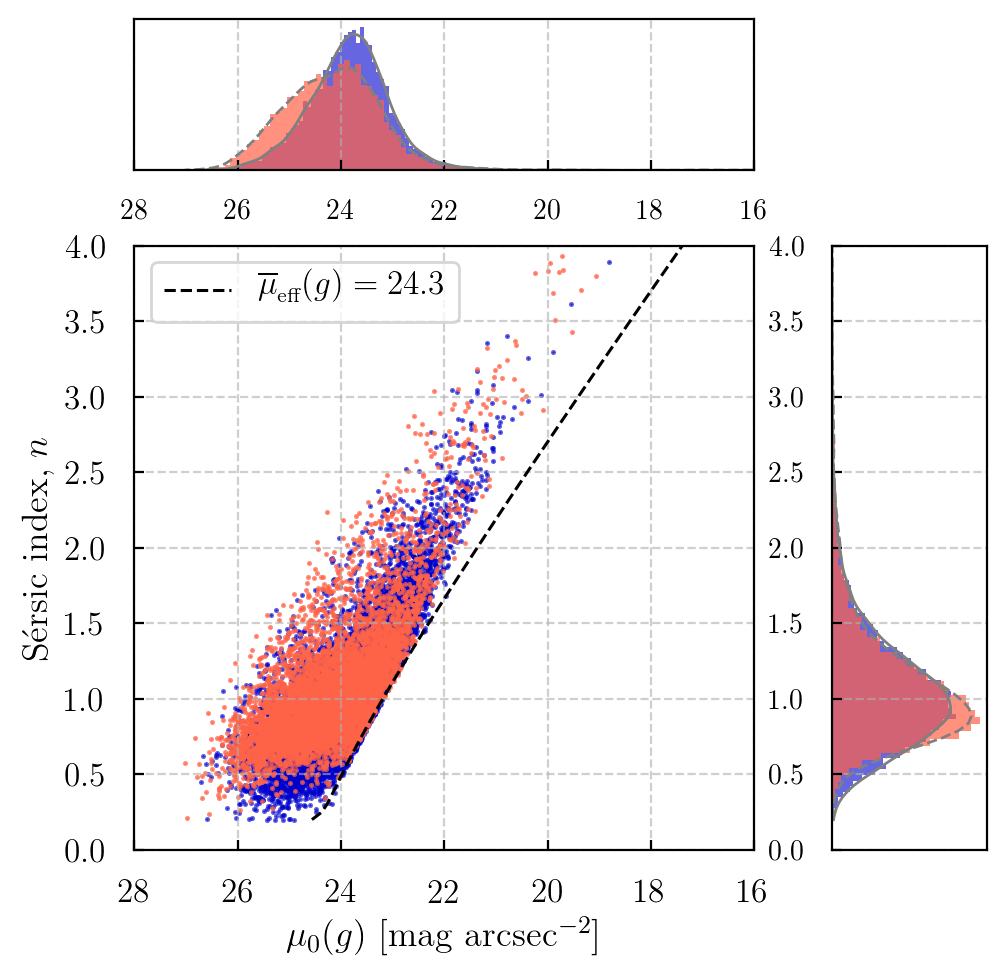

In [13]:
xlabel = '${\mu}_0(g)$ [mag arcsec$^{-2}$]'
ylabel = r'S\'ersic index, $n$'
#ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(dataset_1,dataset_2, dims=4,cols=['mediumblue','tomato'],bins=100,kde=True
                       ,xlabel=xlabel, ylabel=ylabel, xlow=28,xup=16,ylow=0,yup=4)
#ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
#ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
#ax.set_xticks([28,27,26,25,24])

ax.plot(mu_cent_lin,n_lin, ls='--', c='k', linewidth=1.1, label=r'${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)=24.3$')


ax.legend(frameon=True, loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('Cent_surf_sersic.pdf', dpi=100)
plt.show()

In [14]:
print(np.median(n_red))
print(np.median(n_blue))


0.9910686
1.0068496


In [15]:
print(np.median(mu_cent_red))
print(np.median(mu_cent_blue))

24.146962294766958
23.824769186711293


In [16]:
print(np.max(n_red))
print(np.max(n_blue))
#print(zip(RA[n_ser>4.2],DEC[n_ser>4.2]))

4.999973000000001
3.8951260000000003


### Magnitude plots

First Make a plot of magnitude histograms of the sample.

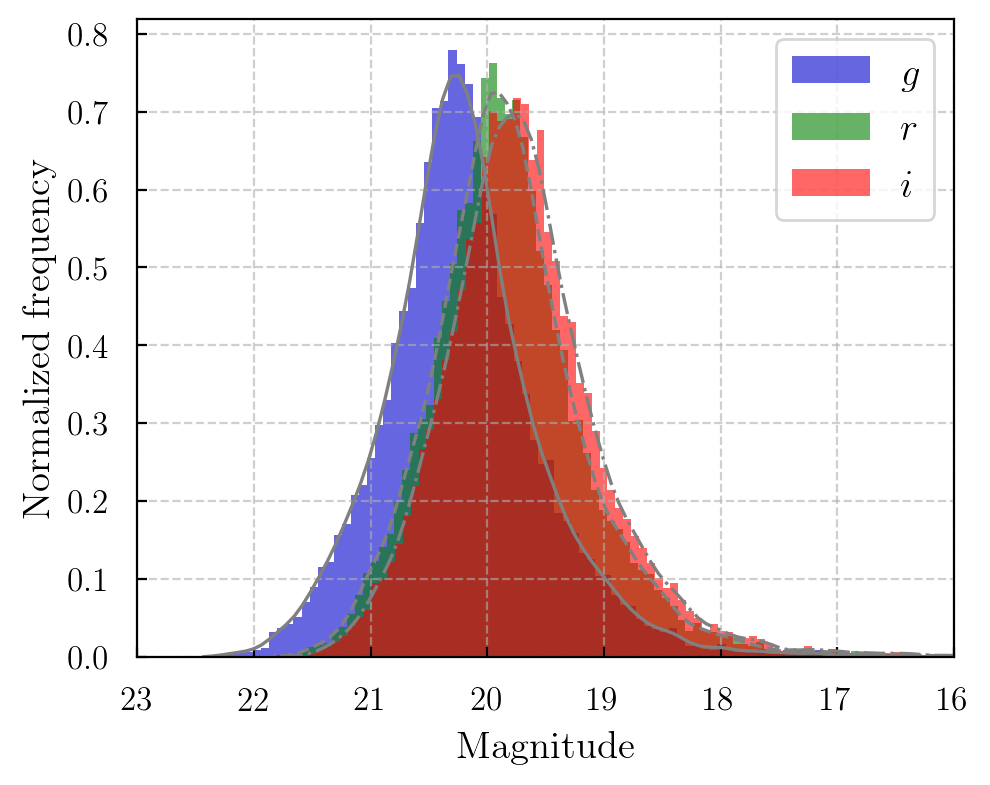

In [17]:
# Kalculate the KDE distriibutions
kde_g =gaussian_kde(mag_g)
kde_r =gaussian_kde(mag_r)
kde_i =gaussian_kde(mag_i)
x_g = np.linspace(mag_g.min(),mag_g.max(),100)
x_r = np.linspace(mag_r.min(),mag_r.max(),100)
x_i = np.linspace(mag_i.min(),mag_i.max(),100)
dx_g=kde_g(x_g)
dx_r=kde_r(x_r)
dx_i=kde_i(x_i)

plt.figure(figsize=(5.,4))
plt.tick_params(axis='both', labelsize=12)

plt.hist(mag_g, bins=100, color='mediumblue', alpha=0.6,density=True, label='$g$')
plt.plot(x_g,dx_g, c='gray',linewidth=1.2)
plt.hist(mag_r, bins=100, color='green', alpha=0.6,density=True, label='$r$')
plt.plot(x_r,dx_r, c='gray',ls='--',linewidth=1.2)
plt.hist(mag_i, bins=100, color='red', alpha=0.6,density=True, label='$i$')
plt.plot(x_i,dx_i, c='gray',ls='-.',linewidth=1.2)

plt.grid(ls='--', axis='both' ,alpha=0.6)


plt.legend(frameon=True, loc='upper right', fontsize=14)
plt.xlim(23,16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Normalized frequency', fontsize=14)


plt.tight_layout()
plt.savefig('mag_plots.pdf', dpi=100)
plt.show()

## Size vs magnitude

In [18]:
# Magnitudes
mag_g_blue = mag_g[(col_g_i<med_g_i)]
mag_g_red = mag_g[(col_g_i>med_g_i)]
# Radii
eff_rad_blue = R_eff[(col_g_i<med_g_i)]
eff_rad_red = R_eff[(col_g_i>med_g_i)]

# Create a "dataset" compatible to the jointPlot function
data_1 = np.zeros((len(mag_g_blue),2))
data_1[:,0] = mag_g_blue;data_1[:,1] = eff_rad_blue
data_2 = np.zeros((len(mag_g_red),2))
data_2[:,0] = mag_g_red;data_2[:,1] = eff_rad_red

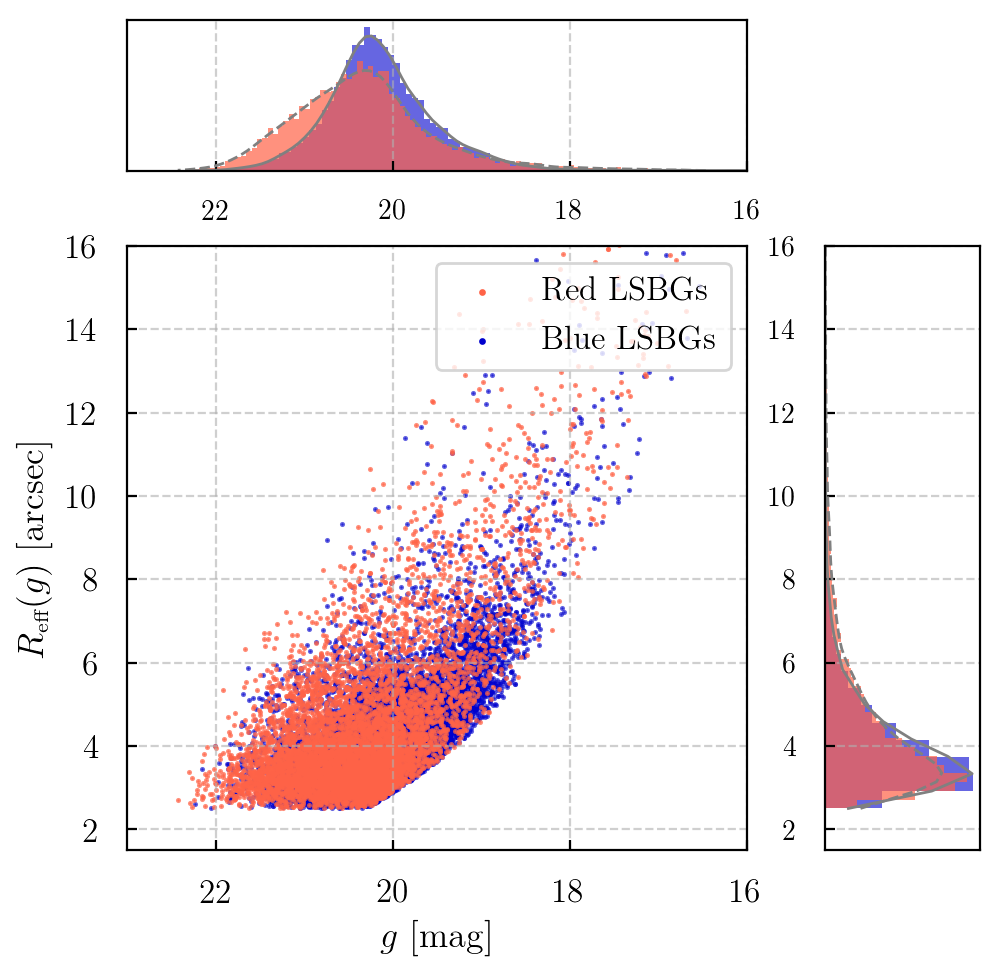

In [19]:
xlabel = '$g$ [mag]'
ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
#ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(data_1,data_2, dims=4,cols=['mediumblue','tomato'],bins=100,kde=True
                       ,xlabel=xlabel, ylabel=ylabel, xlow=16,xup=23,ylow=1.5,yup=16)
#ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
#ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
#ax.set_xticks([28,27,26,25,24])


ax.scatter(mag_g_red[0],20, s=2,color='tomato', label='Red LSBGs')
ax.scatter(mag_g_blue[100],20,s=2, color='mediumblue', label='Blue LSBGs')

ax.legend(frameon=True, loc='upper right', fontsize=12)

plt.tight_layout()
plt.xlim(23,16)
plt.savefig('mag_size.pdf', dpi=100)
plt.show()

## Sersic index vs magnitude

In [20]:
# Magnitudes
mag_g_blue = mag_g[(col_g_i<med_g_i)]
mag_g_red = mag_g[(col_g_i>med_g_i)]
# Sersic indices
n_ser_blue = n_ser[(col_g_i<med_g_i)]
n_ser_red = n_ser[(col_g_i>med_g_i)]


# Create a "dataset" compatible to the jointPlot function
data_1 = np.zeros((len(mag_g_blue),2))
data_1[:,0] = mag_g_blue;data_1[:,1] = n_ser_blue
data_2 = np.zeros((len(mag_g_red),2))
data_2[:,0] = mag_g_red;data_2[:,1] = n_ser_red

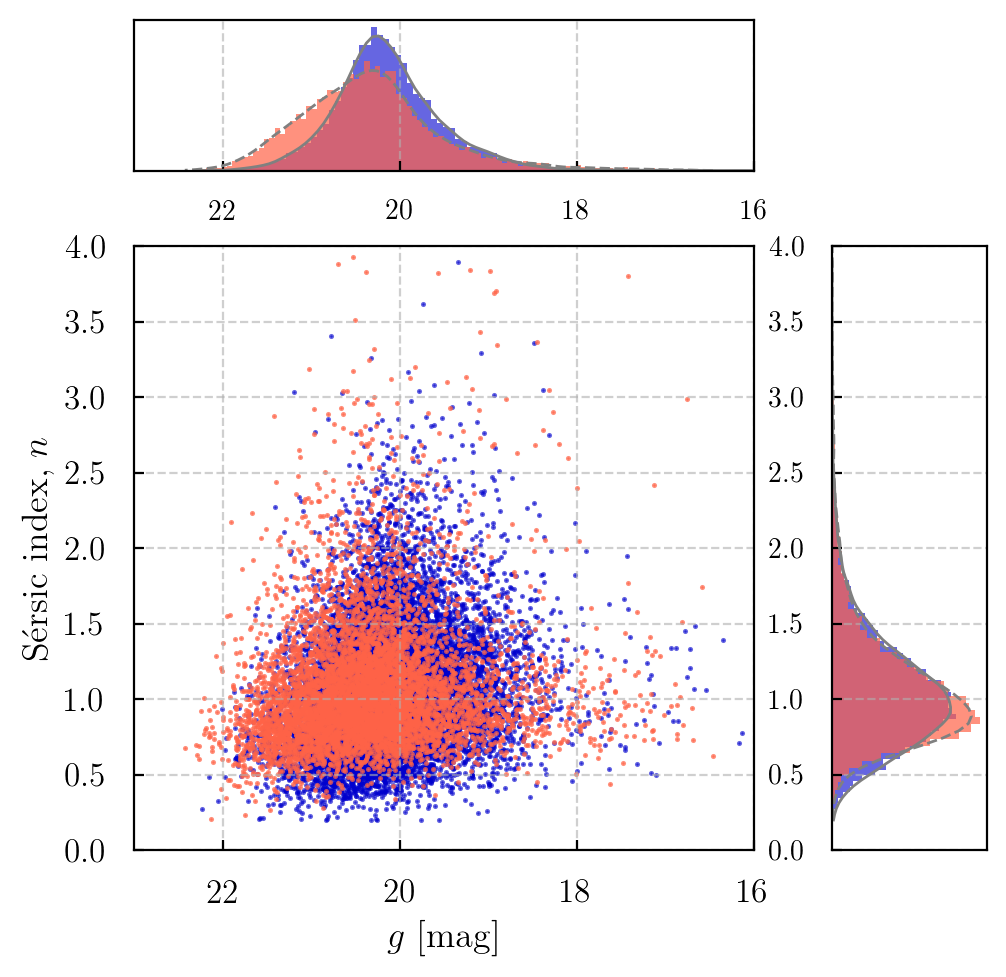

In [21]:
xlabel = '$g$ [mag]'
ylabel = r'S\'ersic index, $n$'
#ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(data_1,data_2, dims=4,cols=['mediumblue','tomato'],bins=100,kde=True
                       ,xlabel=xlabel, ylabel=ylabel, xlow=16,xup=23,ylow=0.,yup=4)
#ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
#ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
#ax.set_xticks([28,27,26,25,24])


#ax.scatter(mag_g_red[0],eff_rad_red[0], s=2,color='tomato', label='Red LSBGs')
#ax.scatter(mag_g_blue[100],eff_rad_blue[100],s=2, color='mediumblue', label='Blue LSBGs')

#ax.legend(frameon=True, loc='upper right', fontsize=12)

plt.tight_layout()
plt.xlim(23,16)
plt.savefig('Ser_index.pdf', dpi=150)
plt.show()

### Distribution of the LSB and 2MPZ galaxy samples

In [22]:
# Open and read the 2MPZ catalog
matched = fits.open('2mpz_y3_gold_match.fits')
#print(matched[1].header.keys)

ra_match = matched[1].data['RA']
dec_match = matched[1].data['DEC']
ext_mof = matched[1].data['EXTENDED_CLASS_MOF']
ext_coadd = matched[1].data['EXTENDED_CLASS_COADD']
g_mag_match  = matched[1].data['MAG_AUTO_G']
fluxrad_g_match  = matched[1].data['FLUX_RADIUS_G']
mean_surf = matched[1].data['MU_MEAN_MODEL_G']
z = matched[1].data['BPZ_ZMEAN_MOF']
ra_match = ra_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
dec_match = dec_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
g_mag_match = g_mag_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
fluxrad_g_match = 0.263*fluxrad_g_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
mean_surf = mean_surf[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
print(len(ra_match))
for i in range(len(ra_match)):
    if (ra_match[i] > 150.):
        ra_match[i] = ra_match[i]-360.

#plt.figure(figsize = (8,7))

#plt.scatter(ra_match, dec_match, color='red', s=0.01, alpha=0.5)
#plt.scatter(ra_mpz_in, dec_mpz_in, color='blue', s=0.01, alpha=0.5)
#plt.xlim(110,-70)
#plt.show()

54919


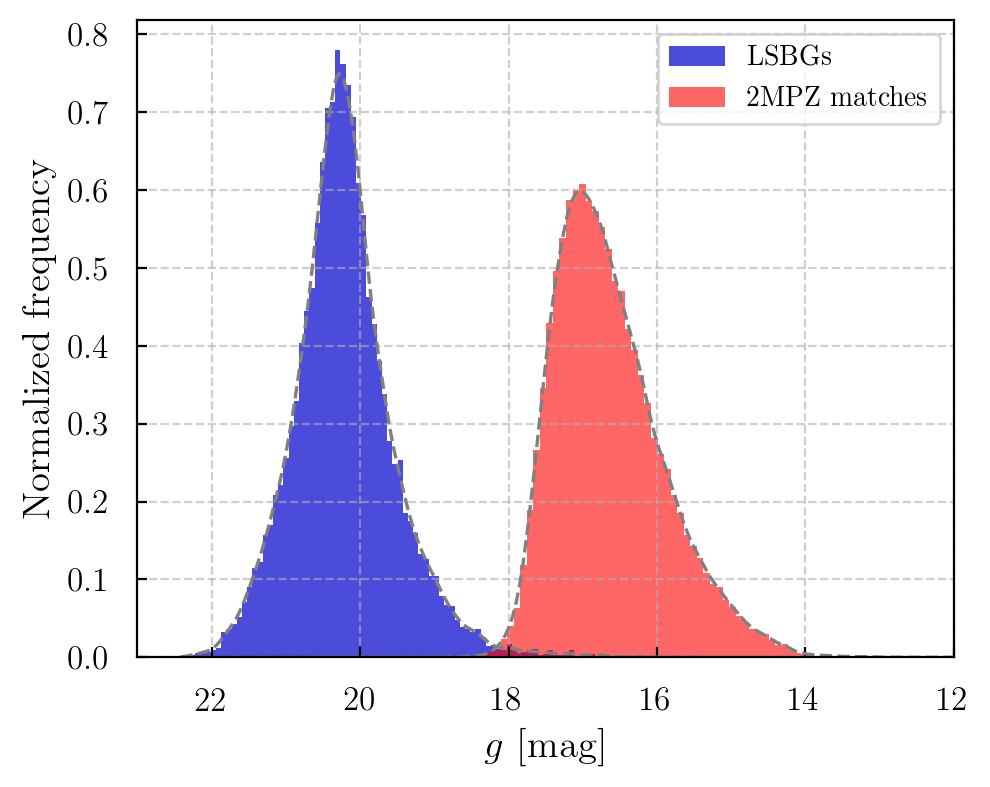

In [23]:
# Kalculate the KDE distriibutions
kde_g =gaussian_kde(mag_g)
kde_match =gaussian_kde(g_mag_match)

x_g = np.linspace(mag_g.min(),mag_g.max(),200)
x_match = np.linspace(g_mag_match.min(),g_mag_match.max(),200)
dx_g=kde_g(x_g)
dx_match=kde_match(x_match)


plt.figure(figsize = (5,4))
plt.tick_params(axis='both', labelsize=12)
plt.hist(mag_g, bins=100,color='mediumblue',density=True, alpha=0.7, label='LSBGs')
plt.hist(g_mag_match[g_mag_match<20], bins=100,color='red',density=True, alpha=0.6, label='2MPZ matches')
#plt.hist(mag_redist,bins=100,density=True)


plt.plot(x_g,dx_g, c='gray',ls='--',linewidth=1.2)
plt.plot(x_match,dx_match,ls='--', c='gray',linewidth=1.2)

plt.xlim(23,12)

plt.grid(ls='--', axis='both' ,alpha=0.6)

plt.xlabel('$g$ [mag]', fontsize=14)
plt.ylabel('Normalized frequency', fontsize=14)
plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig('LSBG_and_2MPZ.pdf', dpi=200)
plt.show()

In [24]:
print(np.median(mag_i))

19.746008


In [25]:
print(np.median(g_mag_match[g_mag_match<20]))

16.755693


### Number of red LSBGs within 0.5 of the peaks

In [26]:
# First import some things we are gonna need
from astropy import units as u
from astropy.coordinates import SkyCoord

In [27]:
RA_red = RA[(col_g_i<med_g_i)]
DEC_red = DEC[(col_g_i<med_g_i)]

# Import the peaks catalog
ra_pk, dec_pk = np.loadtxt("Peaks_coords.dat", usecols=(0,1), unpack=3)

In [28]:
# Create object for the positions of the red galaxies
C_red = SkyCoord(ra=RA_red*u.degree, dec=DEC_red*u.degree, frame='icrs')

num = 0
for i in range(len(ra_pk)):
    ra_pk_loc = ra_pk[i]
    dec_pk_loc = dec_pk[i]
    
    # Create object for the position of the peak
    C_pk = SkyCoord(ra=ra_pk_loc*u.degree, dec=dec_pk_loc*u.degree, frame='icrs')
    
    # Calculate angular separations
    sep_lsb_pk = C_red.separation(C_pk).deg # Separation between peak and reds
    ra_in = RA_red[sep_lsb_pk<1.0]
    num += len(ra_in)

In [29]:
print(num)

1178


In [30]:
2205./7366.

0.2993483573174043

In [31]:
1261./14057.

0.08970619620118091